In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import mxnet as mx

In [2]:
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original')

In [4]:
X = mnist.data.shape

In [5]:
np.random.seed(1234)

In [6]:
p = np.random.permutation(mnist.data.shape[0])

In [28]:
X = mnist.data[p]

In [29]:
X = X.reshape((70000,28,28))

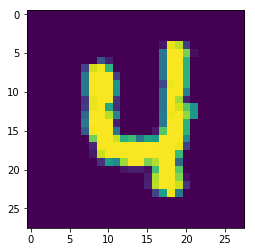

In [30]:
plt.imshow(X[0])

In [31]:
import cv2

In [32]:
X = np.asarray([cv2.resize(x,(64,64)) for x in X])

In [33]:
X.shape

(70000, 64, 64)

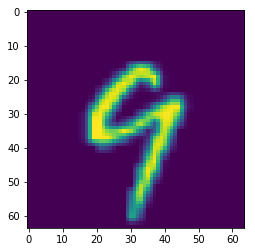

In [34]:
plt.imshow(X[1])

In [35]:
X = X.astype(np.float32)/(255.0/2) - 1.0

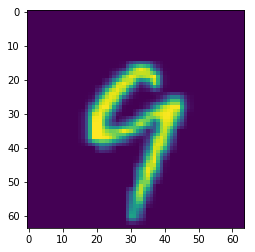

In [36]:
plt.imshow(X[1])

In [37]:
X = X.reshape((70000,1,64,64))

In [38]:
Y= X.reshape((70000,64,64))

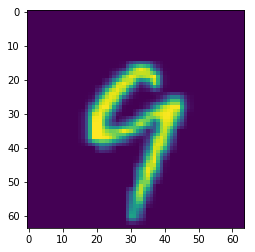

In [40]:
plt.imshow(Y[1])

In [41]:
Z = np.tile(X,(1,3,1,1))

In [42]:
Z.shape

(70000, 3, 64, 64)

In [48]:
Q = X.transpose((0, 2, 3, 1))

In [49]:
Q.shape

(70000, 64, 64, 1)

In [44]:
Q=Z[0].reshape((64,64))

ValueError: total size of new array must be unchanged

In [24]:
Q.shape

(64, 64)

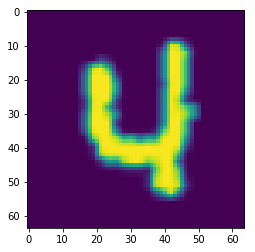

In [25]:
plt.imshow(Q)

In [27]:
X_train = X[:10000]

In [28]:
train_iter = mx.io.NDArrayIter(X_train, batch_size=4)

In [197]:
train_iter.reset()

In [47]:
train_iter

In [198]:
batch=list(enumerate(train_iter))[0][1]

In [171]:
batch

In [199]:
batch.data[0].asnumpy().shape

(1, 3, 64, 64)

In [200]:
p = batch.data[0].asnumpy()

In [207]:
p=np.reshape(p,(1,64,64,3))

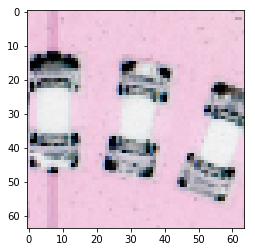

In [212]:
plt.imshow(p[0])

In [136]:
b=batch.data[0].asnumpy()

In [173]:
c=b.transpose((0,2,3,1))

In [174]:
c.shape

(1, 64, 64, 3)

In [139]:
c = np.clip((c+1.0)*(255.0/2.0),0,255).astype(np.uint8)

In [140]:
c.shape

(1, 64, 64, 3)

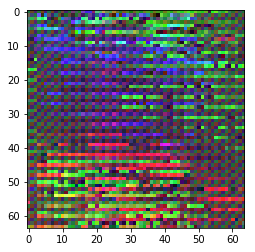

In [175]:
plt.imshow(c[0])

In [141]:
n = np.ceil(np.sqrt(c.shape[0]))

In [142]:
n=1

In [143]:
buff = np.zeros((int(n*c.shape[1]),int(n*c.shape[2]),int(c.shape[3])),dtype=np.uint8)

In [144]:
buff.shape

(64, 64, 3)

In [145]:
def fill_buf(buf,i,img,shape):
    n = buf.shape[0]/shape[1]
    m = buf.shape[1]/shape[0]
    sx = (i%m)*shape[0]
    sy = (i/m)*shape[1]
    buf[sy:sy+shape[1],sx:sx+shape[0],:] = img

In [146]:
d=list(enumerate(c))[0]

In [147]:
fill_buf(buff,d[0],d[1],c.shape[1:3])

In [148]:
biff = cv2.cvtColor(buff,cv2.COLOR_BGR2RGB)

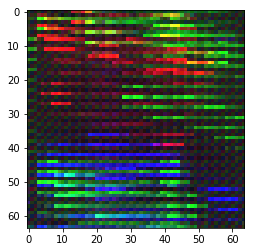

In [149]:
plt.imshow(biff)

In [156]:
image_root='/home/junwon/smt-data/images/images_bgr_r0402/R0402'

In [177]:
img_list=[]

In [178]:
import os
for image in os.listdir(image_root):
    image_path = os.path.join(image_root,image)
    img = plt.imread(image_path)
    img_list.append(img)

In [179]:
X = np.asarray([cv2.resize(x,(64,64)) for x in img_list])

In [180]:
img_list[1].shape

(208, 208, 3)

In [181]:
X[1].shape

(64, 64, 3)

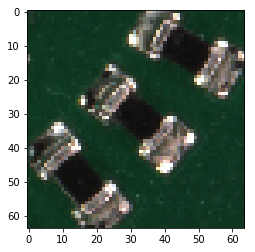

In [182]:
plt.imshow(X[1])

In [163]:
X= X.astype(np.float32)/(255.0/2)-1.0

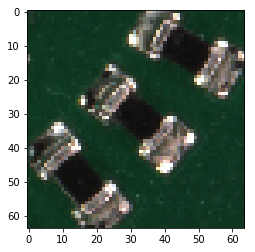

In [183]:
plt.imshow(X[1])

In [184]:
num_img = X.shape[0]

In [185]:
num_img

106

In [186]:
X.shape

(106, 64, 64, 3)

In [194]:
X= np.reshape(X,(num_img,3,64,64))

In [195]:
X.shape

(106, 3, 64, 64)

In [189]:
X = np.reshape(X,(num_img,64,64,3))

TypeError: Invalid dimensions for image data

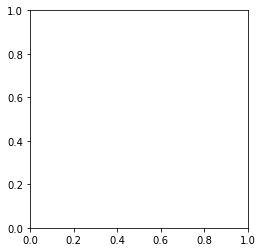

In [213]:
plt.imshow(X[0])

In [196]:
train_iter = mx.io.NDArrayIter(X,batch_size=1)